In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
test = pd.read_csv('/content/test.csv')

In [ ]:
data.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
118,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,320000
295,296,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
437,438,45,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,119000
939,940,70,RL,NaN,24090,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,COD,Normal,244400
198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000
113,114,20,RL,NaN,21000,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,10,2007,COD,Abnorml,217000
469,470,60,RL,76.0,9291,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,187000
1053,1054,20,RL,68.0,8562,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,144500
792,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
120,121,80,RL,NaN,21453,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,180000


In [ ]:
categorical_cols = ['MSZoning', 'LotConfig','Neighborhood', 'Condition1', 'Foundation', 'HeatingQC']

In [ ]:
for var in categorical_cols:
  try:
    classes = sorted(data[var].unique())
    n_classses = len(classes)
    classes_to_numbers = dict(zip(classes, range(n_classses)))
    data[var] = data[var].map(classes_to_numbers)
  except:
    print(var)
data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,61,20,3,63.0,13072,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,158000
99,100,20,3,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950
1032,1033,60,3,NaN,14541,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,310000
787,788,60,3,76.0,10142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,233000
1306,1307,120,3,48.0,6955,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,202500


In [ ]:
data[categorical_cols] = data[categorical_cols].astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   int64   
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   int64   
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   int64   
 13  Condition1     1460 non-null   int64   
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

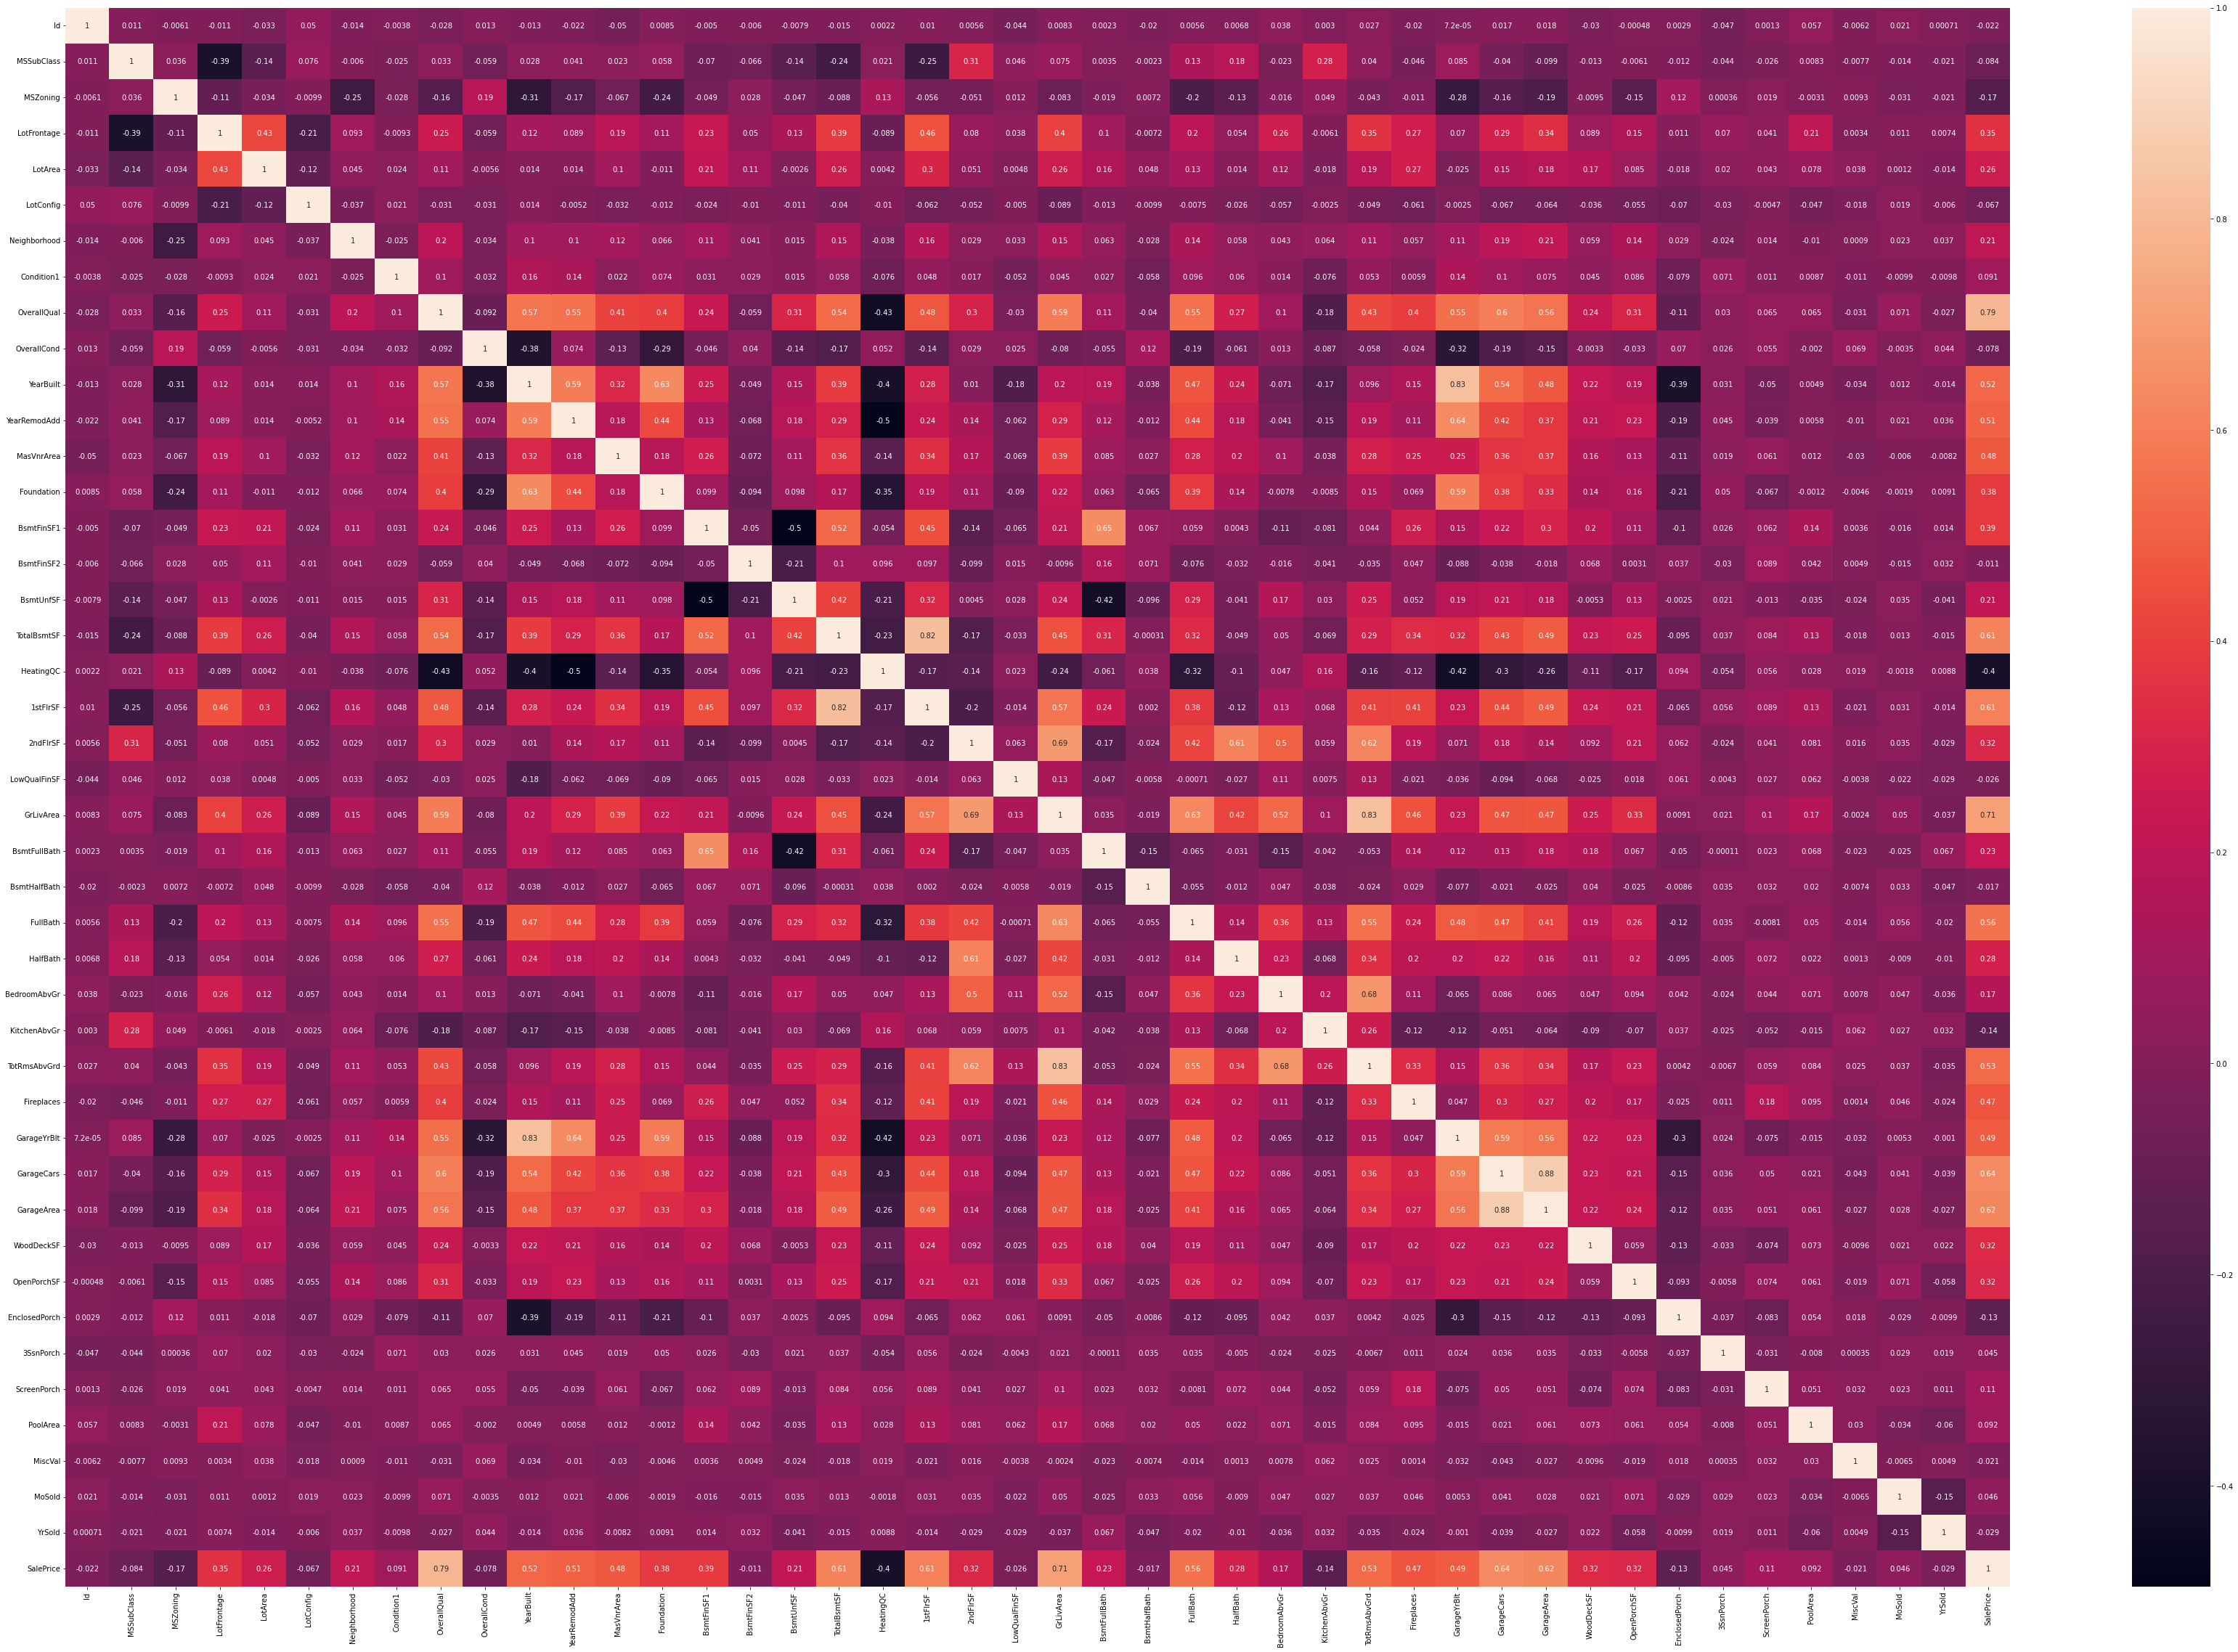

In [ ]:
plt.figure(figsize=(60, 40))
corr = corr = data.corr()
sns.heatmap(corr, annot= True)

In [ ]:
k = 15
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [ ]:
data = data[cols]
data.sample(5)

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1
127,87000,5,840,0,0,672,840,1,5,1930,1950,NaN,0.0,1,116
1408,125500,4,1363,2,528,622,741,1,6,1910,1950,1966.0,0.0,0,0
1182,745000,10,4476,3,813,2396,2411,3,10,1996,1996,1996.0,0.0,2,2096
1225,145000,6,1138,1,264,588,1138,1,6,1958,1958,1958.0,63.0,0,507
1260,181000,6,1675,2,502,841,892,2,7,1999,1999,1999.0,0.0,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageCars    1460 non-null   int64  
 4   GarageArea    1460 non-null   int64  
 5   TotalBsmtSF   1460 non-null   int64  
 6   1stFlrSF      1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  GarageYrBlt   1379 non-null   float64
 12  MasVnrArea    1452 non-null   float64
 13  Fireplaces    1460 non-null   int64  
 14  HeatingQC     1460 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 171.2 KB


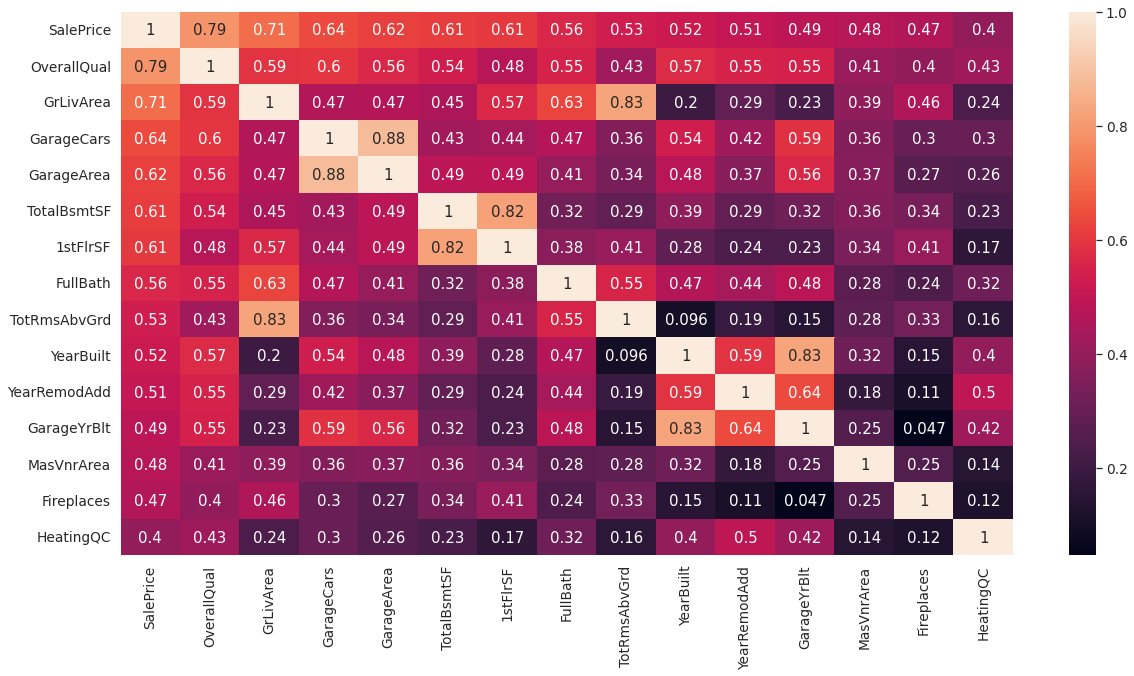

In [ ]:
corr = data.corr()
plt.figure(figsize= (20, 10))
sns.heatmap(corr, annot= True)

In [ ]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'HeatingQC'],
      dtype='object')

In [ ]:
data.drop(columns= ['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'GarageYrBlt'], inplace= True)

In [ ]:
data.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,HeatingQC
0,208500,7,1710,2,856,2,2003,2003,196.0,0,4
1,181500,6,1262,2,1262,2,1976,1976,0.0,1,4
2,223500,7,1786,2,920,2,2001,2002,162.0,1,4
3,140000,7,1717,3,756,1,1915,1970,0.0,1,2
4,250000,8,2198,3,1145,2,2000,2000,350.0,1,4


In [ ]:
data.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,HeatingQC
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,1057.429452,1.565068,1971.267808,1984.865753,103.685262,0.613014,2.461644
std,79442.502883,1.382997,525.480383,0.747315,438.705324,0.550916,30.202904,20.645407,181.066207,0.644666,1.739524
min,34900.000000,1.000000,334.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000
25%,129975.000000,5.000000,1129.500000,1.000000,795.750000,1.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000
50%,163000.000000,6.000000,1464.000000,2.000000,991.500000,2.000000,1973.000000,1994.000000,0.000000,1.000000,4.000000
75%,214000.000000,7.000000,1776.750000,2.000000,1298.250000,2.000000,2000.000000,2004.000000,166.000000,1.000000,4.000000
max,755000.000000,10.000000,5642.000000,4.000000,6110.000000,3.000000,2010.000000,2010.000000,1600.000000,3.000000,4.000000


In [ ]:
data.duplicated().sum()

0

In [ ]:
categorical_cols = ['OverallQual', 'GarageCars', 'FullBath', 'Fireplaces', 'HeatingQC']
data[categorical_cols] = data[categorical_cols].astype('category')

KeyError: ignored

In [ ]:
columns = data.select_dtypes(exclude= 'category').columns
m = len(columns)
m

6

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

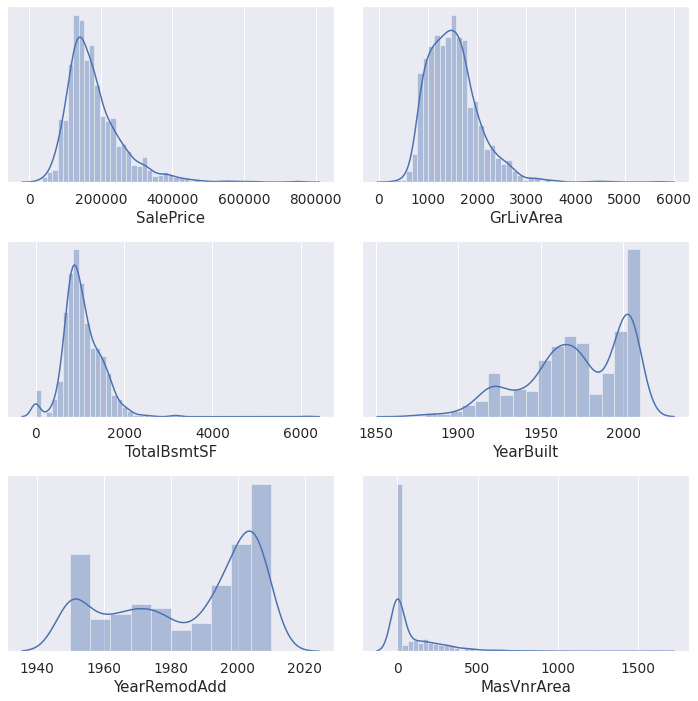

In [ ]:
plt.figure(figsize= (10,10))
for i in range (m):
  plt.subplot(3,2,i+1)
  plt.yticks([])
  sns.distplot(data[columns[i]])
plt.tight_layout()

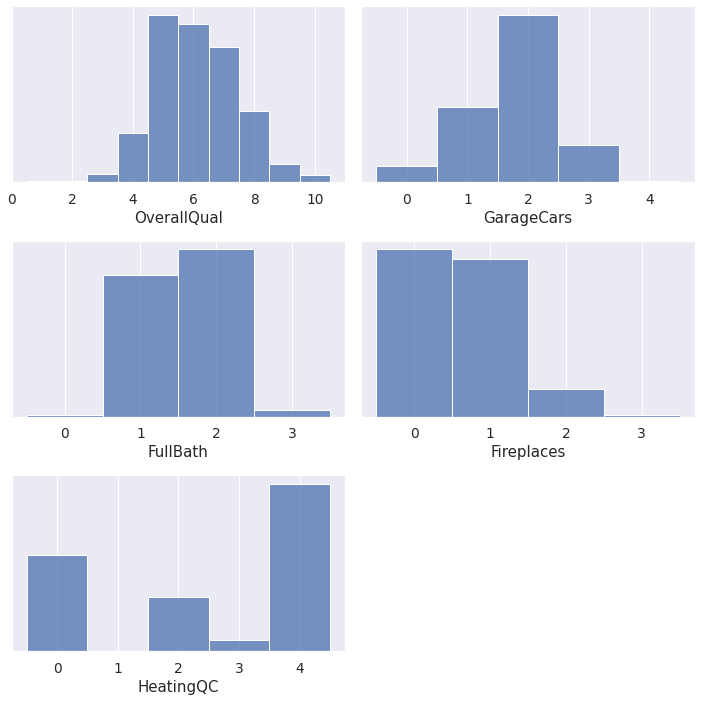

In [ ]:
columns = data.select_dtypes(include= 'category').columns
m = len(columns)
plt.figure(figsize= (10,10))
for i in range (m):
  plt.subplot(3,2,i+1)
  plt.yticks([])
  sns.histplot(data[columns[i]])
plt.tight_layout()

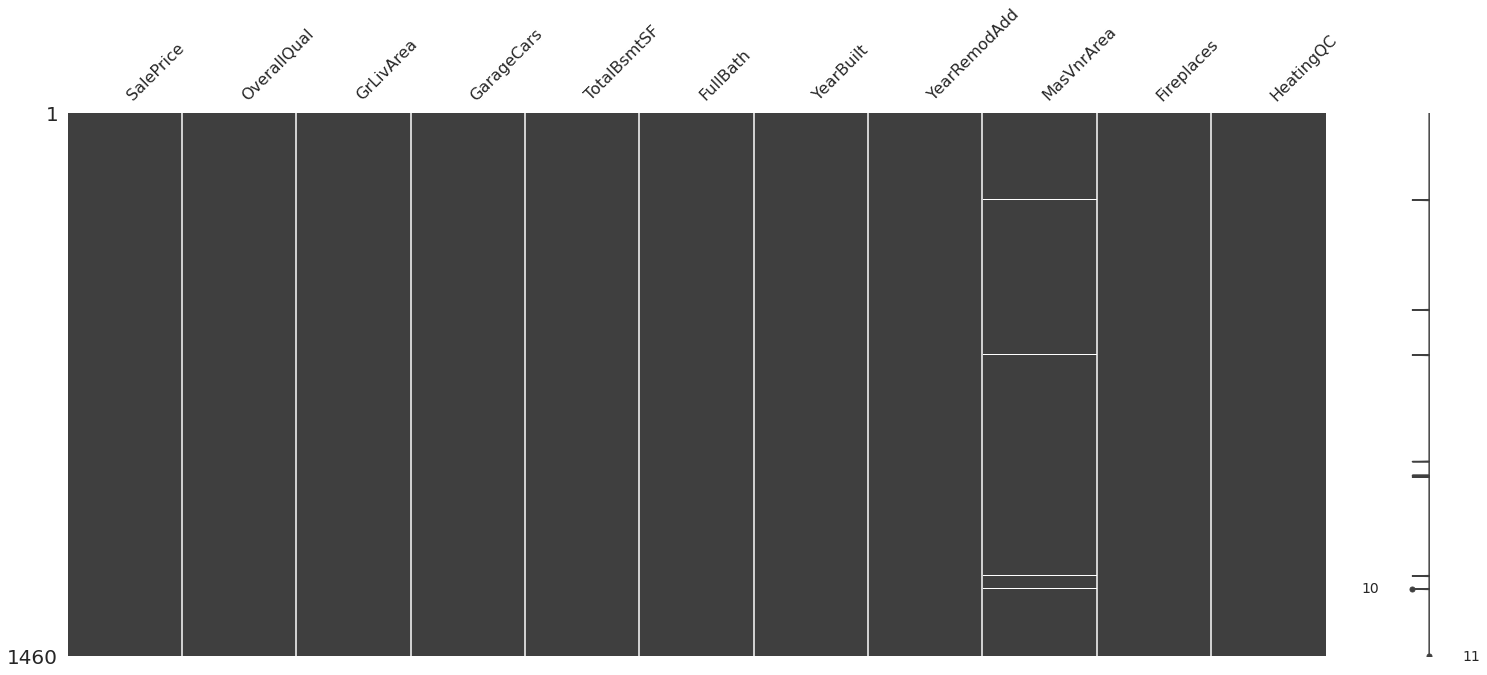

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [ ]:
skewed = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'MasVnrArea']
data[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

In [ ]:
columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'HeatingQC'],
      dtype='object')

In [ ]:
categorical_cols = ['OverallQual', 'GarageCars', 'FullBath', 'Fireplaces', 'HeatingQC']
data[categorical_cols] = data[categorical_cols].astype('int64')

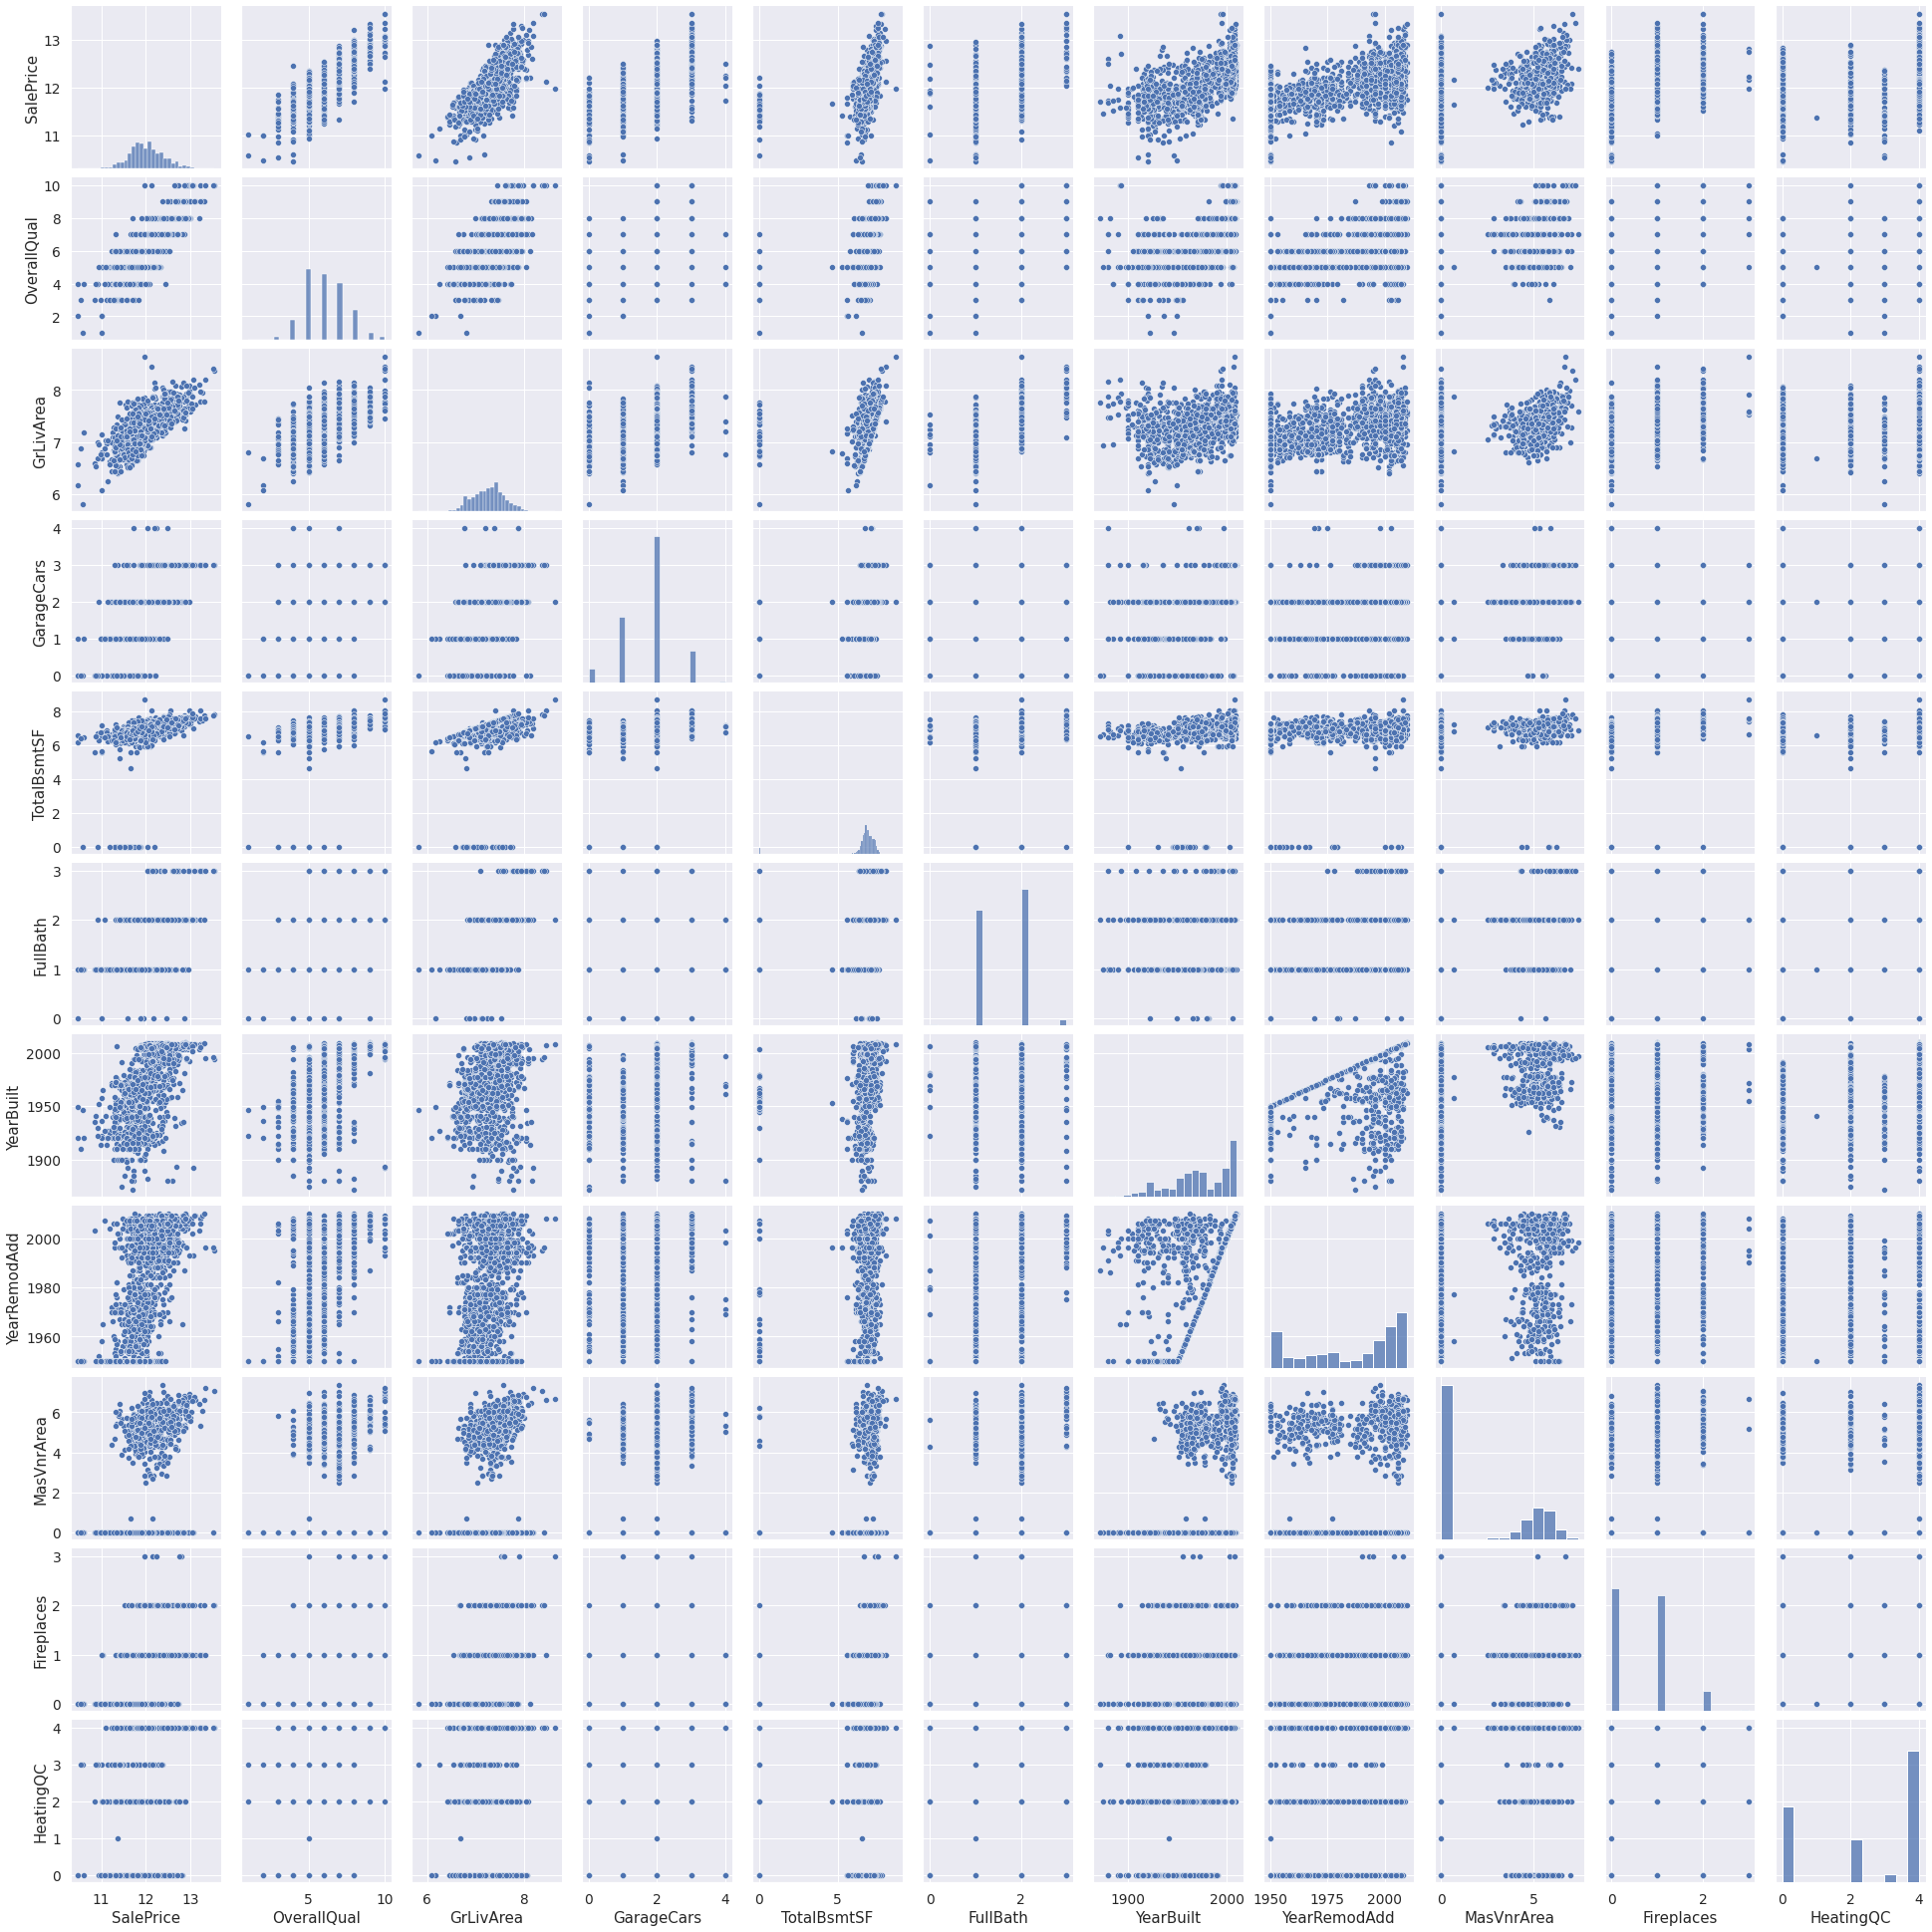

In [ ]:
sns.pairplot(data)

In [ ]:
y = data['SalePrice']
X = data.iloc[:, 1:]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
scaler = StandardScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.8521433723708851

In [ ]:
reg.score(X_test, y_test)

0.811921258443451

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors= 5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
knn.score(X_train, y_train)

0.8630253185566281

In [ ]:
knn.score(X_test, y_test)

0.8486937593738588

In [ ]:
knn = KNeighborsRegressor(n_neighbors= 2)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9227238778177793
0.8221085837212839


In [ ]:
knn = KNeighborsRegressor(n_neighbors= 1)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9999085668914323
0.7915572024281602


In [ ]:
knn = KNeighborsRegressor(n_neighbors= 7)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8496363501998864
0.859437869195765


In [ ]:
knn = KNeighborsRegressor(n_neighbors= 10)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8377064082449601
0.8541931302470926


In [ ]:
knn = KNeighborsRegressor(n_neighbors= 20)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8114075331222316
0.8412508951681066
